In [4]:
import os.path

import numpy as np

In [14]:
a = np.ones((3, 3, 1))
b = np.ones((3, 3, 1))

In [16]:
c = []
c.append(a)
c.append(b)

In [29]:
d = np.concatenate(c, axis=2)

In [30]:
d.shape

(3, 3, 2)

In [17]:
import numpy as np
data = np.load("data/buffer/train/0_retina_1536x2048x2044x2_2062_18.npy")

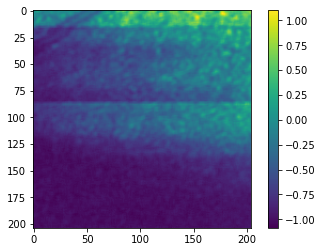

In [18]:
import matplotlib.pyplot as plt
plt.imshow(data[..., 1])
plt.colorbar()

In [31]:
import InputListUtils
mylist = InputListUtils.__fill_healthy_input_list()
len(mylist)

102

In [20]:
4 // 3

1

In [10]:
inp = k.layers.Input((128, 128, 3))
op = k.layers.Conv2D(32, (3, 3), activation='relu')(inp)
model = k.models.Model(inputs=[ inp ], outputs = [op] )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = k.models.Sequential()
model.add(k.layers.Conv2D(32, 3, activation='relu', padding="same", input_shape=(32, 32, 2)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        608       
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [2]:
import PreprocessData
file_list = PreprocessData.PreprocessData.load_file_list(test_or_train="train", angio_or_structure="structure")

In [2]:
file_list

[('data/diabetic_structure/train_files/enf_1536x2048x2045x2_31015.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_11353.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_20785.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2044x2_13994.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2044x2_4525.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_6338.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_17468.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2044x2_4257.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_23250.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_20677.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_29246.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_22396.png', 0.8),
 ('data/diabetic_structure/train_files/enf_1536x2048x2045x2_20212.p

In [7]:
import skimage.io as sk_io
import matplotlib.pyplot as plt

In [28]:
for file in file_list[-1]:
    image = sk_io.imread(file[0])

FileNotFoundError: No such file: '/home/julius/dataspellprojects/oct-classifier/d'

In [38]:
image1 = sk_io.imread(file_list[-1][0])[:100, :100]
image2 = sk_io.imread(file_list[0][0])[:100, :100]

In [36]:
image = image[:100, :100]

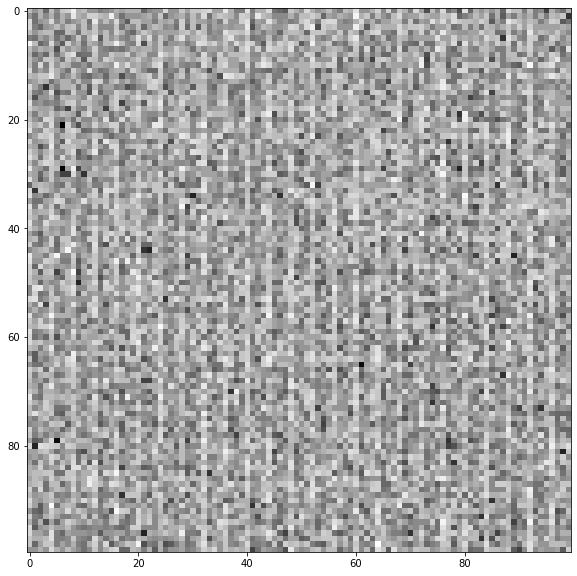

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(image1[:100, :100], "Greys")

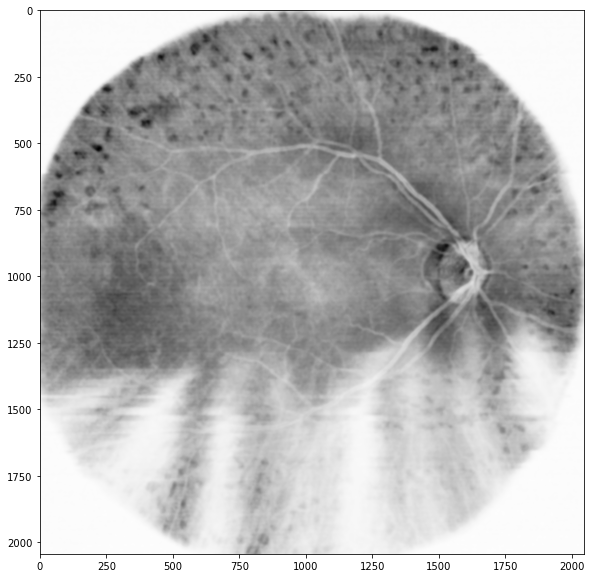

In [214]:
image3 = sk_io.imread(file_list[0][0])
import skimage.filters as sk_fi
plt.figure(figsize=(10, 10))
plt.imshow(sk_fi.gaussian(image3, sigma=4), "Greys")

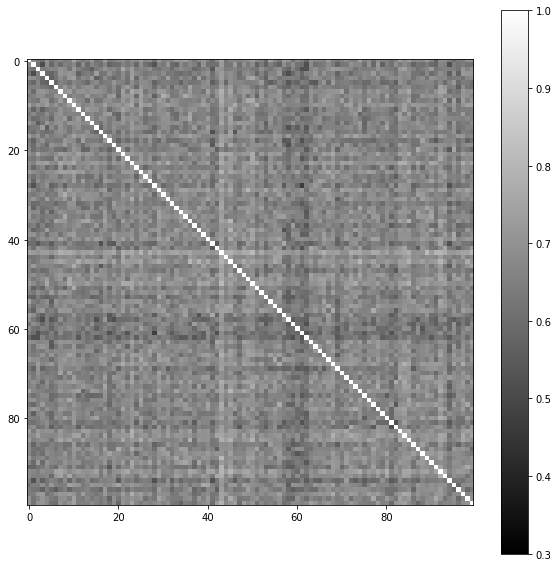

In [59]:
import numpy as np
plt.figure(figsize=(10, 10))
plt.imshow(np.corrcoef(image2), "gray")
plt.clim(0.3, 1)
plt.colorbar()

In [72]:
np.mean(np.corrcoef(image2))

0.669876819094786

In [62]:
np.mean(np.corrcoef(image2))

NameError: name 'image6' is not defined

In [63]:
import os

In [68]:
diabetic_corr = []
healthy_corr = []

In [109]:
diabetic_corr = []
healthy_corr = []

file_list = PreprocessData.PreprocessData.load_file_list(test_or_train="train", angio_or_structure="images")
for file in file_list:
    image = sk_io.imread(file[0])[:100, :100]
    if file[1] == 0.8:
        diabetic_corr.append(np.nanmean(np.corrcoef(image)))
    else:
        healthy_corr.append(np.nanmean(np.corrcoef(image)))

/tmp/ipykernel_2559386/3939439896.py:8: RuntimeWarning: Mean of empty slice
  diabetic_corr.append(np.nanmean(np.corrcoef(image)))


In [ ]:
out=np.convolve(arr,kern, mode='same')

In [230]:
diabetic_corr_test = []
healthy_corr_test = []

file_list_test = PreprocessData.PreprocessData.load_file_list(test_or_train="train", angio_or_structure="structure")
for file in file_list_test:
    image = sk_io.imread(file[0])[:100, :100]
    if file[1] == 0.8:
        diabetic_corr_test.append(np.mean(np.corrcoef(sk_fi.rank.mean(image, np.ones((4, 4))))))
    else:
        healthy_corr_test.append(np.mean(np.corrcoef(sk_fi.rank.mean(image, np.ones((4, 4))))))

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [8]:
diabetic_corr_test = []
healthy_corr_test = []

file_list_test = PreprocessData.PreprocessData.load_file_list(test_or_train="test", angio_or_structure="structure")
for file in file_list_test:
    image = sk_io.imread(file[0])[:100, :100]
    if file[1] == 0.8:
        diabetic_corr_test.append(np.mean(np.corrcoef(image)))
    else:
        healthy_corr_test.append(np.mean(np.corrcoef(image)))


In [13]:
a = sk_io.imread(file_list_test[0][0])

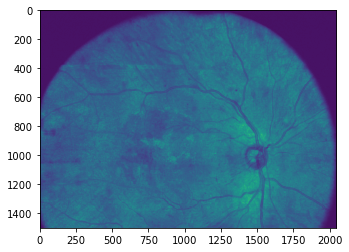

In [15]:
plt.imshow(a[:1500, :2047])

In [5]:
import numpy as np
white_noise_image = np.random.normal(0, 1, size=(100, 100))

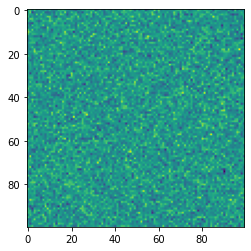

In [9]:
plt.imshow(white_noise_image)

In [12]:
np.mean(np.corrcoef(white_noise_image))

0.007575047965375501

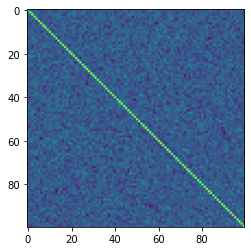

In [11]:
plt.imshow(np.corrcoef(white_noise_image))

In [151]:
import numpy as np
k=2
kern=np.ones(2*k+1)/(2*k+1)
arr=np.random.random((10, 10))
out=np.convolve(arr,kern, mode='same')

ValueError: object too deep for desired array

In [28]:
from scipy.fft import fft2, ifft2

# 3D Kernel:
def apply_kernel(data: np.array, kernel: np.array) -> np.array:
    """
    Applies 3x3 Kernel to 2D Image
    :param data: Image that the Kernel is applied to
    :param kernel: Filter
    :return: Filterd Image
    """
    # Embed Kernel such that it lays over first element
    apply_kernel_shape = np.zeros(data.shape)
    apply_kernel_shape[:2, :2, :2] = kernel
    apply_kernel = np.roll(np.roll(np.roll(apply_kernel_shape, -1, axis=0), -1, axis=1), -1, axis=2)
    print(apply_kernel[4])

    # Apply Kernel via Convolution
    filterd_data = ifft2(fft2(data)*fft2(apply_kernel)).real
    print(ifft2(fft2(data)*fft2(apply_kernel)).shape)
    return filterd_data

In [20]:
kernel = np.ones((2, 2, 2)) * 1/(2*2*2)
kernel

array([[[0.125, 0.125],
        [0.125, 0.125]],

       [[0.125, 0.125],
        [0.125, 0.125]]])

In [29]:
filtered_image = apply_kernel(image, kernel)

[[0.125 0.    0.    0.    0.125]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.125 0.    0.    0.    0.125]]
(5, 5, 5)


In [220]:
sk_fi.rank.mean(image, np.ones((2, 2)))

array([[25, 23, 20, ..., 24, 19, 20],
       [23, 23, 21, ..., 21, 19, 21],
       [22, 23, 20, ..., 20, 19, 21],
       ...,
       [21, 21, 20, ..., 18, 17, 20],
       [22, 22, 20, ..., 20, 19, 21],
       [23, 21, 17, ..., 22, 19, 20]], dtype=uint8)

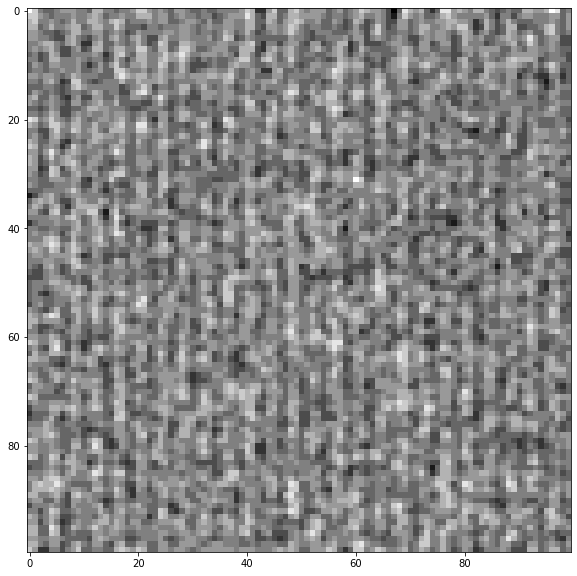

In [219]:
plt.figure(figsize=(10, 10))
plt.imshow(sk_fi.rank.mean(image, np.ones((2, 2))), "gray")

In [ ]:

plt.figure(figsize=(10, 10))
#plt.hist(diabetic_corr, bins=50)
#plt.hist(healthy_corr, bins=50)
plt.hist(diabetic_corr_test, bins=30)
plt.hist(healthy_corr_test, bins=30)

In [70]:
diabetic_corr

[0.669876819094786,
 0.18619521602386654,
 0.4516142208186297,
 0.168791115763608,
 0.16437721138484052,
 0.5528160037616302,
 0.5443275560422216,
 0.2205645244873087,
 0.49907621910473826,
 0.44126112400387973,
 0.4410400924283473,
 0.5008858893990142,
 0.48942564462489774,
 0.5160475764488499,
 0.41040627477803243,
 0.6137820241052498,
 0.40530669619047904,
 0.7397298057140165,
 0.44215649265480206,
 0.5492623786507184,
 0.6199734128746058,
 0.422870328858602,
 0.23228672473332462,
 0.5172283789523452,
 0.5330238943721973,
 0.4436524004961674,
 0.5764004444074544,
 0.47464121952274835,
 0.41230083783733207,
 0.17250352206552966,
 0.6572693339568374,
 0.47524782986200126,
 0.45178585895490925,
 0.17359447453610632,
 0.4129585963203279,
 0.5540157750323107,
 0.44118356808813425,
 0.3830181537957701,
 0.4529911134624861,
 0.23111681400978643,
 0.4849293196302418,
 0.3194490024631379,
 0.3126205583447588,
 0.4651168714914731,
 0.25879647858668287,
 0.16358335094659132,
 0.298222405116386

In [71]:
healthy_corr

[0.260107356577155,
 0.270028847495261,
 0.2047794660080304,
 0.19445226346116581,
 0.2118597164886446,
 0.2998359011697094,
 0.34684726136484295,
 0.22014313310917796,
 0.31437449925554317,
 0.26047571886111953,
 0.22730789243368343,
 0.21877888738131504,
 0.25130994876373225,
 0.1967742535958147,
 0.271828913574915,
 0.2168561716154213,
 0.2530261304740675,
 0.24651226933102272,
 0.3036695000898888,
 0.349086581090025,
 0.2943560872567531,
 0.21387658210527433,
 0.21207328929640754,
 0.29800024443449613,
 0.27632656303836445,
 0.26145773889968477,
 0.2779563532702227,
 0.2444270084727473,
 0.3298079228911595,
 0.22607952117412602,
 0.20801232192243474,
 0.20348162993475696,
 0.32610454151984,
 0.3576114251764503,
 0.21018851092008298,
 0.18970686426102143,
 0.22715336245904663,
 0.18948267747513178,
 0.24417254499870641,
 0.21746644890557318,
 0.22436284325198358,
 0.22582288080608254,
 0.23852267654658846,
 0.23800031921256487,
 0.22688235166529083,
 0.22556047544022448,
 0.30776773

In [66]:
 print(f"Label: {file[1]}, Correllation: {np.mean(np.corrcoef(image))}, File Name: {os.path.basename(file[0])}")

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


nan